In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [12]:
original_imagem = cv2.imread('images/lena.jpg')
original_imagem = cv2.cvtColor(original_imagem, cv2.COLOR_BGR2RGB)

In [13]:
def add_salt_papper(image, prob):
    noisy_image = image.copy()

    salt_mask = np.random.random(image.shape) < prob / 2
    pepper_mask = np.random.random(image.shape) < prob / 2

    noisy_image[salt_mask] = 255
    noisy_image[pepper_mask] = 0

    return noisy_image

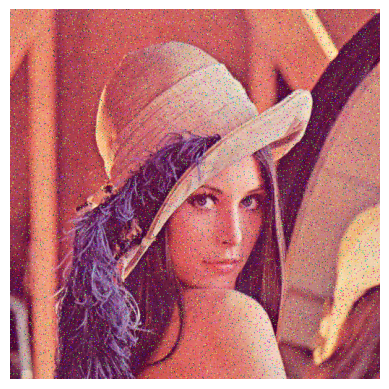

In [15]:
noisy_image = add_salt_papper(original_imagem, 0.05)
plt.imshow(noisy_image)
plt.axis('off')
plt.show()

In [16]:
def remove_salt_paper(image, kernel_size=3):
    if len(image.shape) == 3:
        result = np.zeros_like(image)
        for i in range(3):
            result[:, :, i] = cv2.medianBlur(image[:, :, i], kernel_size)
    else:
        result = cv2.medianBlur(image, kernel_size)

    return result

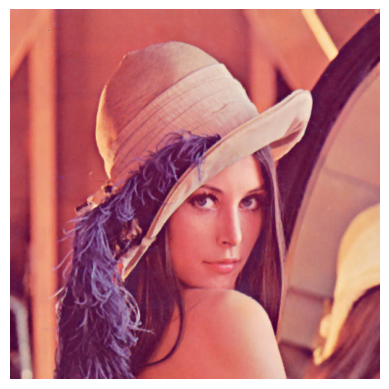

In [19]:
denoised_image = remove_salt_paper(noisy_image)
plt.imshow(denoised_image)
plt.axis('off')
plt.show()

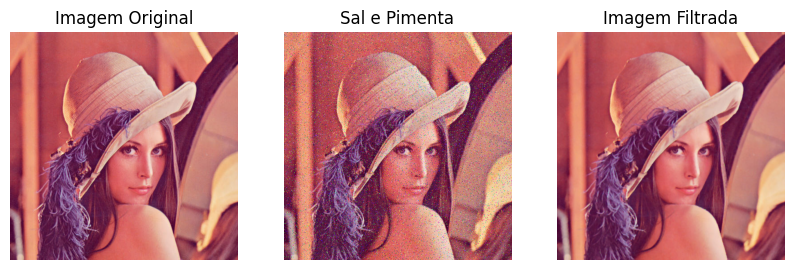

In [20]:
plt.figure(figsize=(10, 10))

plt.subplot(1, 3, 1)
plt.imshow(original_imagem)
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image)
plt.title('Sal e Pimenta')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(denoised_image)
plt.title('Imagem Filtrada')
plt.axis('off')

plt.show()